# INFO 3402 – Week 09: Time series

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)  

## Setup

In [1]:
import numpy as np
np.set_printoptions(suppress=True)

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sb

## Background

Much of the data we have worked with so far has been categorical and cross-sectional, but many of you have likely started to encounter examples of temporal data: observations that also include timestamps. Working with temporal data brings a host of challenges since dates and times can be so irregular: 60 seconds within 60 minutes within 24-hour days within 7-day weeks within 28, 29, 30, or 31-day months; time elapsed; time zones; and more! Working with temporal data is a common problem so there are powerful libraries, functions, methods, and attributes within Python to help you. 

## `datetime` library

A "classic" joke among Python programmers is the very justifiable confusion between the [datetime object](https://docs.python.org/3/library/datetime.html#datetime-objects) within the [datetime module](https://docs.python.org/3/library/datetime.html).

<div>
<img src="https://external-preview.redd.it/zvDEM_ZO9yMYRHFvy4oPndpSxuBhQnUucQUASB3foOc.png?auto=webp&s=0287e0eeff39d34a6202f2ba22e733a553b38a8b" width="400"/>
</div>

<div>
<img src="https://i.redd.it/j4hy36mdzmn31.png" width="400"/>
</div>

<div>
<img src="https://memegenerator.net/img/instances/55315123/say-datetime-one-more-time.jpg" width="400"/>
</div>


Time and dates are confusing to work with, so let's take a moment to embrace the confusion and commit to working through them together.

* **`datetime`** objects contain both time and date information (year, month, day, hour, minute, second, microseconds)
* **`date`** objects contain only date information (year, month, day)
* **`time`** objects contain only time information (hour, minute, second, microseconds)

There are some additional classes within the datetime library that can also be helpful in various applications.

* **`timedelta`** is a measure of duration or difference between two dates/times/datetimes
* **`tzinfo`** is for handling time zone information.

In [2]:
import datetime

### `datetime` attributes and methods

`.now()` can get the time right now.

In [4]:
now = datetime.datetime.now()
now

datetime.datetime(2022, 3, 8, 11, 23, 2, 69450)

There's also a `.utcnow()` that gets the "[coordinated universal time](https://en.wikipedia.org/wiki/Coordinated_Universal_Time)" time (basically, the time at 0° longitude in London) rather than my system's current time.

In [5]:
utc = datetime.datetime.utcnow()
utc

datetime.datetime(2022, 3, 8, 18, 23, 8, 760856)

Make a `datetime` object for your birthday.

In [6]:
birthday = datetime.datetime(1984,2,13,7,0)
birthday

datetime.datetime(1984, 2, 13, 7, 0)

Note what happens when you try to pass a string to `datetime.datetime`. You should get a `TypeError`: datetime doesn't support converting string representations of dates into `datetime` objects. We will discuss how to move between strings and `datetime` using `strptime` below.

In [7]:
datetime.datetime('2020-09-25')

TypeError: an integer is required (got type str)

There are a variety of attributes and methods we can call on a datetime object to extract relevant information.

Methods for converting from `datetime` objects to `date` or `time` objects.

In [8]:
now.date()

datetime.date(2022, 3, 8)

In [9]:
now.time()

datetime.time(11, 23, 2, 69450)

Attributes of a `date`, `time`, or `datetime` object:
* **`.year`**
* **`.month`**
* **`.day`**
* **`.hour`**
* **`.minute`**
* **`.second`**
* **`.year`**

In [10]:
now.hour, now.minute, now.second

(11, 23, 2)

There are some other conversion methods that are powerful:

* **`.weekday()`**
* **`.isoweekday()`**
* **`.isoformat()`**

In [14]:
now.isoweekday()

2

### `strftime` vs. `strptime`

Dates and times are often stored as strings like "2020-07-04" or "07\04\2020" to represent July 4, 2020 in the U.S. or April 7, 2020 in Europe (see? dates and times can be really frustrating!): [Date format by country](https://en.wikipedia.org/wiki/Date_format_by_country).

If you want to convert a string to a datetime object, you use `strptime`. If you want to convert a datetime object to a string, you use `strftime`. These use a common "grammar" for representing temporal elements (years, months, days, hours, minutes, seconds, weekdays, *etc.*): [strftime and strptime Behavior](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) Some of the most common elements of this format:

* `%A` - Weekday full name
* `%d` - Day of the month number as a zero-padded decimal
* `%B` - Month full name
* `%m` - Month number as a zero-padded decimal
* `%Y` - Year with century (typically four digits)
* `%H` - 24-hour clock hour as a zero-padded decimal
* `%M` - Minute as a zero-padded decimal
* `%S` - Second as a zero-padded decimal

There are others like day of the year, week of the year, timezones, *etc*.

Convert a datetime into a string using `strftime(format)`.

In [17]:
datetime.datetime(2022,3,8).strftime('%A! %B %d, %Y and we\'re at %S seconds')

"Tuesday! March 08, 2022 and we're at 00 seconds"

Convert a string into a datetime using `strptime(date_string, format)`.

In [18]:
str_time = datetime.datetime.strptime('Tuesday, March 8, 2022 11:27 am', '%A, %B %d, %Y %H:%M %p')
str_time

datetime.datetime(2022, 3, 8, 11, 27)

### Unix timestamps

Sometimes computer scientists represent time as the number of seconds elapsed since midnight on January 1, 1970. That moment was second 0 and every second since then is incremented. This is popularly known as "[Unix time](https://en.wikipedia.org/wiki/Unix_time)" or the "Unix epoch". 

Many of you are too young to remember the panic around the [Y2K problem](https://en.wikipedia.org/wiki/Year_2000_problem) when computers that represented time as a two digit number made 2000 indistinguishable from 1900. But there's a much bigger problem known as the [Year 2038 problem](https://en.wikipedia.org/wiki/Year_2038_problem) when 32-bit computing systems that keep track of time using Unix timestamps will similarly be confused on January 19, 2038 whether it is 1901, 1970, or 2038. 32-bit systems can't store numbers larger than $2^{31} - 1$ or 2,147,483,647. The date  2,147,483,647 seconds after January 1, 1970 is January 19, 2038 at 3:14:07 UTC. Mark that date in your calendars when a lot of basic social and technical infrastructure relying on any kind of computing devices is at risk of failure.

<div>
<img src="https://imageproxy.ifunny.co/crop:x-20,resize:320x,crop:x800,quality:90x75/images/4810476c0d383f6210bb02cb8e26eafbfd0803104b91da23abae4446d31ada53_1.jpg" width="400"/>
</div>

You can convert a `datetime` object into its Unix time with `.timestamp()` method.

In [19]:
now.timestamp()

1646763782.06945

You can also convert from Unix timestamps you encounter in the wild to datetime objects with the `fromtimestamp` method.

In [28]:
datetime.datetime.fromtimestamp(1085762563)

datetime.datetime(2004, 5, 28, 10, 42, 43)

What happens to your computer when you call `timestamp()` on a `datetime` from January 20, 2038?

In [29]:
datetime.datetime(2038,1,20).timestamp()

2147583600.0

### `timedelta`

We can also do operations on `datetime` objects, like computing the amount of time between two datetimes.

In [39]:
birthday_td = now - birthday
birthday_td

datetime.timedelta(days=13903, seconds=15782, microseconds=69450)

You can also use a `timedelta` to perform operations on a `datetime` object.

In [37]:
birthday + datetime.timedelta(seconds=1000000000)

datetime.datetime(2015, 10, 22, 8, 46, 40)

Finally, you can convert `timedelta` objects into simpler `float` or `int` objects by dividing a `timedelta` by a "unit" `timedelta`. The `timedelta` returned by subtracting now from my birthday can be divided by a `timedelta` of 1 minute to return an float representation of my current age in minutes.

In [46]:
birthday_td/datetime.timedelta(days=3650)

3.809091140504344

## Dates and time in `pandas`

pandas has its own type of object called a [`Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) for representing time, dates, and datetimes that is distinct from `datetime`. There are good reasons for pandas to have its own representation, but it can definitely be frustrating and annoying having to juggle two distinct, sometimes compatible, and sometimes incompatible representations of dates and times within Python.

In [47]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

### `Timestamp`

One of the biggest and most powerful differences between datetime's `datetime` and panda's `Timestamp` is that `Timestamp` will automatically recognize and convert strings to `Timestamp`s without needing you to use the gnarly `strftime`/`strptime` syntax. 

Note that pandas's `Timestamp` is very, *very*, **very** different from the Unix time `.timestamp()` method in `datetime`.

Make a `Timestamp` object for today.

In [52]:
ts_now = pd.Timestamp('2022-03-08 11:00')
ts_now

Timestamp('2022-03-08 11:00:00')

Pass a `datetime` object to pandas's `Timestamp`.

In [53]:
ts_birthday = pd.Timestamp(birthday)
ts_birthday

Timestamp('1984-02-13 07:00:00')

Confirm that these are really different objects.

In [54]:
type(birthday)

datetime.datetime

In [55]:
type(ts_birthday)

pandas._libs.tslibs.timestamps.Timestamp

Pass a UNIX timestamp to `Timestamp`.

In [57]:
ts_unix = pd.Timestamp(18000,unit='d')
ts_unix

Timestamp('2019-04-14 00:00:00')

### New attributes and methods

pandas's `Timestamp` objects have many of the same attributes and methods found for `datetime` objects but they also have some [additional attributes and methods](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) (look in menu on left). I haven't used these often in practice, but they must be useful for enough people.

* ``.quarter`` - What quarter of the year a date is in
* ``.is_leap_year`` - Boolean for whether the current year is a leap year
* ``.to_pydatetime()`` - convert a `Timestamp` to a `datetime`

Experiment to see which of the `datetime` methods and attributes (from above) also work on `Timestamp` objects.

In [58]:
ts_birthday.to_pydatetime()

datetime.datetime(1984, 2, 13, 7, 0)

Try out some of the `Timestamp`-specific attributes and methods.

In [59]:
ts_birthday.is_leap_year

True

### `to_datetime`

Just like pandas's `Timestamp` can auto-magically convert all different kinds of date and time representations to a consistent representation, the `to_datetime()` function can take an array of misshapen and inconsistently typed objects that look like dates and convert them into an array of Timestamps.

Make an array with different representations of dates and see what `to_datetime` does with them.

In [60]:
misshapen_data = ['July 4, 2020','9/11/01',datetime.datetime(1984,2,13,7),datetime.date(2006,6,6)]
misshapen_data

['July 4, 2020',
 '9/11/01',
 datetime.datetime(1984, 2, 13, 7, 0),
 datetime.date(2006, 6, 6)]

In [61]:
pd.to_datetime(misshapen_data)

DatetimeIndex(['2020-07-04 00:00:00', '2001-09-11 00:00:00',
               '1984-02-13 07:00:00', '2006-06-06 00:00:00'],
              dtype='datetime64[ns]', freq=None)

If you read in a CSV file that has datetime information represented as strings, you have at least two options for converting those string representations into `Timestamp` objections.

The first option is to pass the column names to the "parse_dates" option within [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) (or [`read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html), [`read_sql`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html), *etc*.).

Download the "sp500.csv" file from Canvas to the folder where this notebook is running and read it into this notebook as  `sp500_df` and parsing the "Date" column.

In [69]:
sp500_df = pd.read_csv('sp500.csv',parse_dates=['Date'])
sp500_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


Access the first value in the "Date" Series.

In [73]:
sp500_df.loc[0,'Date']

Timestamp('2010-01-04 00:00:00')

The second option is to mutate/convert the column with the dates after they've already been read in. You can use `to_datetime` on the Series or DataFrame column (but I repeat myself!) to convert those values from string to `Timestamp`s and overwrite the previous values.

Read the "sp500_close_volume.csv" file into this notebook without parsing the column as `sp500_df` and then use the `to_datetime` function on the "Date" column to convert it to Timestamps.

In [74]:
sp500_df = pd.read_csv('sp500.csv')
sp500_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


Access the first value in the "Date" Series to see that it is a string, not a `datetime` or `Timestamp`.

In [75]:
sp500_df.loc[0,'Date']

'2010-01-04'

Use `to_datetime` to convert the Series into Timestamp objects.

In [76]:
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])

Check again.

In [77]:
sp500_df.loc[0,'Date']

Timestamp('2010-01-04 00:00:00')

### Exercise: Load Boulder weather data

Load the "boulder_weather.csv" file from Week 1. Make sure the "DATE" column is in a Timestamp format, either from `read_csv` or by using a function like `pd.to_datetime`.

## `date_range`

Because pandas is designed for tabular data with long arrays of values rather than single values, how do you make a range of dates? The [`date_range`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html) function has a number of parameters for creating an array of dates/times. The key parameters for this function are:

* start - when to start the range
* end - when to end the range
* freq - what frequency in between these dates? Defaults to daily, but [other aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases) are possible

Make an array of daily Timestamps for just March 2022.

In [85]:
pd.date_range(start='March 1, 2022',end='March 31, 2022',freq='H')

DatetimeIndex(['2022-03-01 00:00:00', '2022-03-01 01:00:00',
               '2022-03-01 02:00:00', '2022-03-01 03:00:00',
               '2022-03-01 04:00:00', '2022-03-01 05:00:00',
               '2022-03-01 06:00:00', '2022-03-01 07:00:00',
               '2022-03-01 08:00:00', '2022-03-01 09:00:00',
               ...
               '2022-03-30 15:00:00', '2022-03-30 16:00:00',
               '2022-03-30 17:00:00', '2022-03-30 18:00:00',
               '2022-03-30 19:00:00', '2022-03-30 20:00:00',
               '2022-03-30 21:00:00', '2022-03-30 22:00:00',
               '2022-03-30 23:00:00', '2022-03-31 00:00:00'],
              dtype='datetime64[ns]', length=721, freq='H')

In [79]:
pd.date_range(start='2022-03-01',end='2022-03-31',freq='H')

DatetimeIndex(['2022-03-01 00:00:00', '2022-03-01 01:00:00',
               '2022-03-01 02:00:00', '2022-03-01 03:00:00',
               '2022-03-01 04:00:00', '2022-03-01 05:00:00',
               '2022-03-01 06:00:00', '2022-03-01 07:00:00',
               '2022-03-01 08:00:00', '2022-03-01 09:00:00',
               ...
               '2022-03-30 15:00:00', '2022-03-30 16:00:00',
               '2022-03-30 17:00:00', '2022-03-30 18:00:00',
               '2022-03-30 19:00:00', '2022-03-30 20:00:00',
               '2022-03-30 21:00:00', '2022-03-30 22:00:00',
               '2022-03-30 23:00:00', '2022-03-31 00:00:00'],
              dtype='datetime64[ns]', length=721, freq='H')

Make an array of hourly `Timestamps` just for today.

In [91]:
pd.date_range(start='2022-03-08 00:00',periods=24,freq='s')

DatetimeIndex(['2022-03-08 00:00:00', '2022-03-08 00:00:01',
               '2022-03-08 00:00:02', '2022-03-08 00:00:03',
               '2022-03-08 00:00:04', '2022-03-08 00:00:05',
               '2022-03-08 00:00:06', '2022-03-08 00:00:07',
               '2022-03-08 00:00:08', '2022-03-08 00:00:09',
               '2022-03-08 00:00:10', '2022-03-08 00:00:11',
               '2022-03-08 00:00:12', '2022-03-08 00:00:13',
               '2022-03-08 00:00:14', '2022-03-08 00:00:15',
               '2022-03-08 00:00:16', '2022-03-08 00:00:17',
               '2022-03-08 00:00:18', '2022-03-08 00:00:19',
               '2022-03-08 00:00:20', '2022-03-08 00:00:21',
               '2022-03-08 00:00:22', '2022-03-08 00:00:23'],
              dtype='datetime64[ns]', freq='S')

Make an array of just business days from January 1, 2020 to today. (Look up the [alias for business day frequency](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)).

In [92]:
pd.date_range(start='2020-01-01',end='2020-09-25',freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17',
               '2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25'],
              dtype='datetime64[ns]', length=193, freq='B')

### Exercise: Quarter starts since January 2000

Make an array of quarter starts from January 1, 2000 to today.

## Indexing and slicing
We often will use the Timestamp as an index, which means we'll want a way to access and slice different parts of the index.

Use the `.set_index()` method to make the "Date" column an index for `sp500_df`.

In [93]:
sp500_df.set_index('Date',inplace=True)
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


Access the row for March 23, 2020. You can access in several different formats.

In [94]:
sp500_df.loc['2020 March 23']

Open         2.290710e+03
High         2.300730e+03
Low          2.191860e+03
Close        2.237400e+03
Adj Close    2.237400e+03
Volume       7.402180e+09
Name: 2020-03-23 00:00:00, dtype: float64

In [95]:
sp500_df.loc['2020-03-23']

Open         2.290710e+03
High         2.300730e+03
Low          2.191860e+03
Close        2.237400e+03
Adj Close    2.237400e+03
Volume       7.402180e+09
Name: 2020-03-23 00:00:00, dtype: float64

In [96]:
sp500_df.loc['March 23, 2020']

Open         2.290710e+03
High         2.300730e+03
Low          2.191860e+03
Close        2.237400e+03
Adj Close    2.237400e+03
Volume       7.402180e+09
Name: 2020-03-23 00:00:00, dtype: float64

We can also slice using string representations of Timestamps.

In [97]:
sp500_df.loc['2020-03-01':'2020-03-31','Adj Close']

Date
2020-03-02    3090.229980
2020-03-03    3003.370117
2020-03-04    3130.120117
2020-03-05    3023.939941
2020-03-06    2972.370117
2020-03-09    2746.560059
2020-03-10    2882.229980
2020-03-11    2741.379883
2020-03-12    2480.639893
2020-03-13    2711.020020
2020-03-16    2386.129883
2020-03-17    2529.189941
2020-03-18    2398.100098
2020-03-19    2409.389893
2020-03-20    2304.919922
2020-03-23    2237.399902
2020-03-24    2447.330078
2020-03-25    2475.560059
2020-03-26    2630.070068
2020-03-27    2541.469971
2020-03-30    2626.649902
2020-03-31    2584.590088
Name: Adj Close, dtype: float64

In [100]:
sp500_df.loc['2020','Adj Close']

Date
2020-01-02    3257.850098
2020-01-03    3234.850098
2020-01-06    3246.280029
2020-01-07    3237.179932
2020-01-08    3253.050049
                 ...     
2020-12-24    3703.060059
2020-12-28    3735.360107
2020-12-29    3727.040039
2020-12-30    3732.040039
2020-12-31    3756.070068
Name: Adj Close, Length: 253, dtype: float64

You can also slice with other representations of time, including `Timestamp` and `datetime` objects.

In [101]:
sp500_df.loc[datetime.datetime(2020,3,1):datetime.datetime(2020,3,31),'Adj Close']

Date
2020-03-02    3090.229980
2020-03-03    3003.370117
2020-03-04    3130.120117
2020-03-05    3023.939941
2020-03-06    2972.370117
2020-03-09    2746.560059
2020-03-10    2882.229980
2020-03-11    2741.379883
2020-03-12    2480.639893
2020-03-13    2711.020020
2020-03-16    2386.129883
2020-03-17    2529.189941
2020-03-18    2398.100098
2020-03-19    2409.389893
2020-03-20    2304.919922
2020-03-23    2237.399902
2020-03-24    2447.330078
2020-03-25    2475.560059
2020-03-26    2630.070068
2020-03-27    2541.469971
2020-03-30    2626.649902
2020-03-31    2584.590088
Name: Adj Close, dtype: float64

In [102]:
sp500_df.loc[pd.Timestamp('2020-03-01'):pd.Timestamp('2020-03-31'),'Adj Close']

Date
2020-03-02    3090.229980
2020-03-03    3003.370117
2020-03-04    3130.120117
2020-03-05    3023.939941
2020-03-06    2972.370117
2020-03-09    2746.560059
2020-03-10    2882.229980
2020-03-11    2741.379883
2020-03-12    2480.639893
2020-03-13    2711.020020
2020-03-16    2386.129883
2020-03-17    2529.189941
2020-03-18    2398.100098
2020-03-19    2409.389893
2020-03-20    2304.919922
2020-03-23    2237.399902
2020-03-24    2447.330078
2020-03-25    2475.560059
2020-03-26    2630.070068
2020-03-27    2541.469971
2020-03-30    2626.649902
2020-03-31    2584.590088
Name: Adj Close, dtype: float64

### Exercise: Index Boulder weather by date and slice

Use `.set_index()` on the Boulder weather and slice out dates for just 2020.

## Plotting data

Only using datetime, numpy, and matplotlib, here's what a the S&P500 data since 2022 looks like by default.

Text(0.5, 0, 'Date')

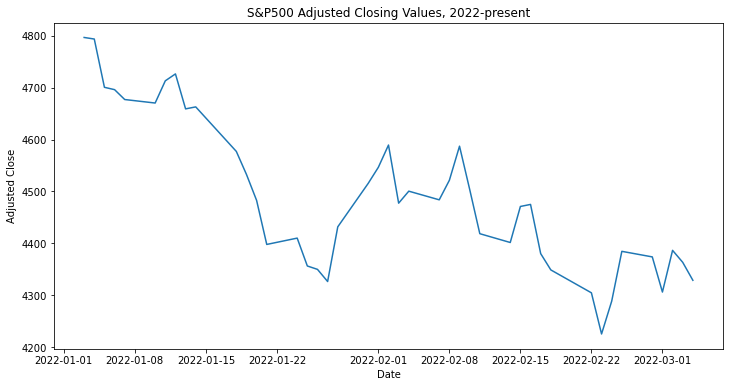

In [103]:
# Turn the data in pandas into numpy arrays and datetimes
dates = sp500_df.loc['2022':,:].index.to_pydatetime()
values = sp500_df.loc['2022':,'Adj Close'].values

# Set up plot
f,ax = plt.subplots(figsize=(12,6))

# Make the plot
ax.plot(dates,values)

# Label the plot
ax.set_title('S&P500 Adjusted Closing Values, 2022-present')
ax.set_ylabel('Adjusted Close')
ax.set_xlabel('Date')

pandas does some fancy stuff under the hood to make the same data look nicer.

Text(0.5, 0, 'Date')

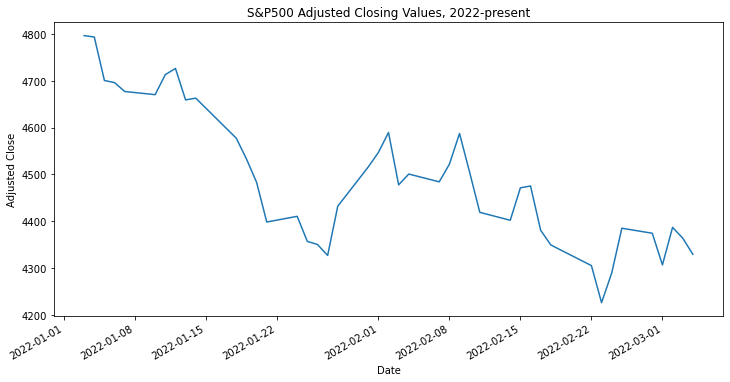

In [104]:
# Set up plot
f,ax = plt.subplots(figsize=(12,6))

# Make the plot
sp500_df.loc['2022':,'Adj Close'].plot(ax=ax)

# Label the plot
ax.set_title('S&P500 Adjusted Closing Values, 2022-present')
ax.set_ylabel('Adjusted Close')
ax.set_xlabel('Date')

Rotating the xtick_labels opens a whole can of worms involving Locator and Formatter functions (see the appendix). The simplest answer is to use the `autofmt_xdate` function ([docs](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.autofmt_xdate), [demo](https://matplotlib.org/stable/gallery/ticks/date_demo_convert.html)) to adjust the rotation and horizontal alignment ('left','center','right').

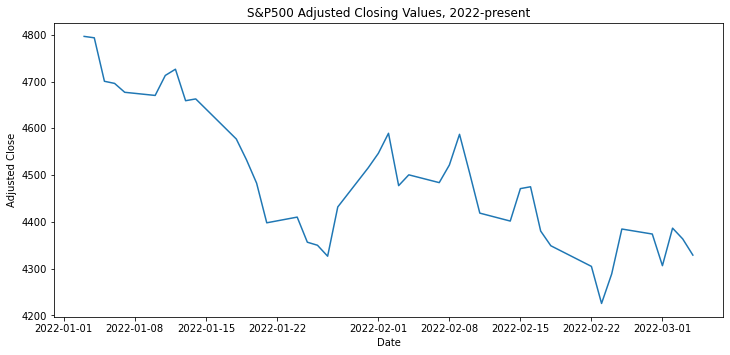

In [105]:
# Set up plot
f,ax = plt.subplots(figsize=(12,6))

# Make the plot
sp500_df.loc['2022':,'Adj Close'].plot(ax=ax)

# Label the plot
ax.set_title('S&P500 Adjusted Closing Values, 2022-present')
ax.set_ylabel('Adjusted Close')
ax.set_xlabel('Date')

f.autofmt_xdate(rotation=0,ha='center')

### Exercise: Plot the weather data for 2019

## Rolling
A rolling average is often a better way to "smooth" out noisy data. This works by averaging observations over a window. You need to chain two methods together to return a rolling average: [`.rolling()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) and `.mean()` but this means you can also return a rolling median, max, and other functions as well.

In [106]:
# Create a new DataFrame
sp500_2020 = pd.DataFrame()

# Add the raw data
sp500_2020['Raw'] = sp500_df.loc['2020-01-01':,'Adj Close']

# Compute the 7-day rolling average
sp500_2020['7-day'] = sp500_2020['Raw'].rolling(7).mean()

# Compute the 90-day rolling average
sp500_2020['90-day'] = sp500_2020['Raw'].rolling(30).mean()

sp500_2020.tail()

,Raw,7-day,90-day
Date,,,
2022-02-28,4373.939941,4329.525670,4444.247965
2022-03-01,4306.259766,4318.954241,4432.361621
2022-03-02,4386.540039,4324.335658,4426.009294
2022-03-03,4363.490234,4332.725725,4420.366976
2022-03-04,4328.870117,4347.492885,4415.238314


Visualization of the raw, weekly, and monthly rolling averages.

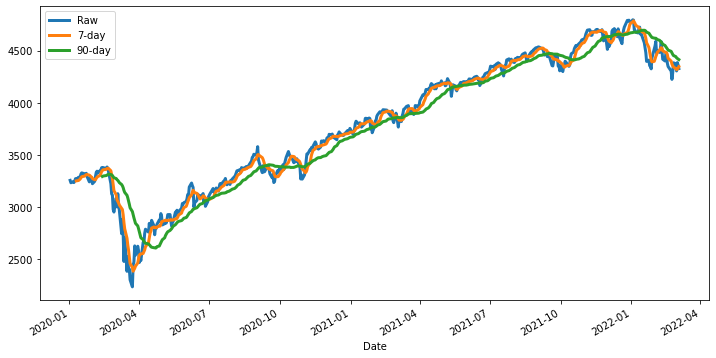

In [107]:
f,ax = plt.subplots(figsize=(12,6))

# Plot the original data in blue
sp500_2020['Raw'].plot(ax = ax,lw = 3, c ='tab:blue')

# Plot the 7-day smoothed data in orange
sp500_2020['7-day'].plot(ax = ax, lw = 3, c = 'tab:orange')

# Plot the 30-day smoothed data in green
sp500_2020['90-day'].plot(ax = ax, lw = 3, c = 'tab:green')

ax.legend(loc='upper left')

### Exercise: Plot a 30-day rolling average of temperatures since 2018

## Reindexing

Reindexing is a method for converting data to match a new index. Reindexing works on just about any kind of data (string, categorical, continuous, *etc*.) but it is especially powerful when working with temporal data. 

Temporal data for say, the stock market, might have gaps for weekends and holidays where social media data is often available every day. Comparing both requires some way of making a Series with all dates and then filling in the missing data.

Identify the first and last dates in the DataFrame.

In [108]:
sp500_df.index.min(), sp500_df.index.max()

(Timestamp('2010-01-04 00:00:00'), Timestamp('2022-03-04 00:00:00'))

Use [`.reindex()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html) and [`date_range()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html) to update the DateTimeIndex to be continuous since the start.

In [109]:
sp500_daterange = pd.date_range(
    start = sp500_df.index.min(),
    end = sp500_df.index.max(),
    freq = 'D'
)

sp500_daterange

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11',
               '2010-01-12', '2010-01-13',
               ...
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26',
               '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-04'],
              dtype='datetime64[ns]', length=4443, freq='D')

What is the size of the current data's date range compared to the new continuous date range?

In [110]:
sp500_df.index.size, sp500_daterange.size

(3064, 4443)

Use the `reindex` method to change the index into the new continuous index.

In [111]:
sp500_reindexed_df = sp500_df.reindex(sp500_daterange)
print(sp500_reindexed_df.shape)
sp500_reindexed_df.head(10)

(4443, 6)


,Open,High,Low,Close,Adj Close,Volume
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3.991400e+09
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2.491020e+09
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4.972660e+09
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5.270680e+09
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4.389590e+09
2010-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4.255780e+09
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4.716160e+09
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4.170360e+09


<AxesSubplot:>

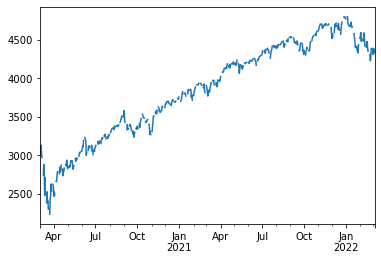

In [115]:
sp500_reindexed_df.loc['2020-03':,'Close'].plot()

Double check that 9 January 2010 was a Saturday. The `.weekday()`, `.dayofweek`, or `.day_of_week` methods or attributes will return the 0-indexed day of the week (0=Monday, 1=Tuesday, 2=Wednesday, 3=Thursday, 4=Friday, 5=Saturday, 6=Sunday)

In [118]:
pd.Timestamp('2011-07-04').dayofweek

0

## Grouping

There are many cases when we might want to perform a groupby-aggregation operation. For example, we may want to aggregate a time series to a lower frequency: from days to months.

We can pass the `Grouper` function ([docs](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html)) inside a `.groupby` method and include parameters for frequency. Here we groupby on the index at a monthly frequency (`freq='M'`) and aggregate the volume to the total volume of each day in that month.

In [119]:
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


<AxesSubplot:xlabel='Date'>

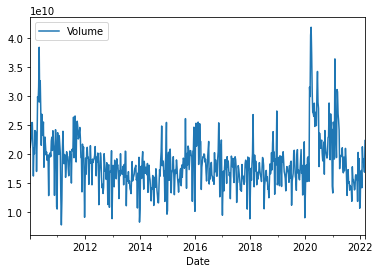

In [123]:
sp500_df.groupby(
    pd.Grouper(freq='W')
).agg({'Volume':'sum'}).plot()

### Exercise: Group the weather by month and plot average monthly windspeed

## `wikifunctions`

`wikifunctions` ([source and docs](https://github.com/brianckeegan/wikifunctions/)) is a collection of functions for retrieving data from the APIs connected to MediaWikis, like Wikipedia. You'll need to have the `wikifunctions.py` file in the same folder as your notebook for the next cell to work: there is no `conda install wikifunctions`.

The functions I use the most are `get_all_page_revisions` and `get_pageviews`.

In [124]:
import wikifunctions as wf

### `get_all_page_revisions`

Every change to a Wikipedia article is preserved in its "[revision history](https://en.wikipedia.org/wiki/Help:Page_history)" ([docs](https://meta.wikimedia.org/wiki/Help:Page_history)). The revision histories are available back to 2001 or 2002 for articles that existed then.

If we retrieve the page revisions for someone like "Hillary Clinton" we can see the first edits to her article were made in March 2001, just two months after Wikipedia was founded.

In [125]:
hillary_df = wf.get_all_page_revisions('Hillary Clinton')
hillary_df.head()

,revid,parentid,user,userid,timestamp,size,sha1,comment,anon,sha1hidden,commenthidden,suppressed,page,date,diff,lag,age
0,855311067,0,Gareth Owen,151,2001-03-07 17:20:17+00:00,166,2da549fa405edb9dacee9b6020417e9a78574d8e,*,NaN,NaN,NaN,NaN,Hillary Clinton,2001-03-07,NaN,NaN,0.000000
1,855311068,855311067,Fw-us-hou-8.bmc.com,8973767,2001-03-07 17:39:16+00:00,248,65610fb66234715a226ac3aa03b79acf6e5ed400,*,NaN,NaN,NaN,NaN,Hillary Clinton,2001-03-07,82.0,1139.0,0.013183
2,855311069,855311068,KoyaanisQatsi,8509,2001-06-11 22:54:32+00:00,281,775de1c7346b5286ee7a26ba06b7b1e51c2ca247,*,NaN,NaN,NaN,NaN,Hillary Clinton,2001-06-11,33.0,8313316.0,96.232118
3,855311070,855311069,KoyaanisQatsi,8509,2001-06-11 22:56:23+00:00,281,f8be9a2e83825d359abac1cd058c44a33c6ecbaa,*,NaN,NaN,NaN,NaN,Hillary Clinton,2001-06-11,0.0,111.0,96.233403
4,855311071,855311070,212.187.124.xxx,0,2001-07-09 19:10:22+00:00,282,5f6004c99d157ec754ef644d4bbbec406cc50f1e,*,True,NaN,NaN,NaN,Hillary Clinton,2001-07-09,1.0,2405639.0,124.076447


Each row in the DataFrame is a single revision made by an editor. There have been more than 17,000 revisions to Clinton's Wikipedia article since the first record in 2001.

In [126]:
len(hillary_df)

17006

We can visit old version and retrieve the content of these versions based on their unique revision ID.

In [128]:
# Find the minimum revision ID
min_revid = hillary_df['revid'].min()

# Print out a URL with the revision ID so we can go visit it
print("https://en.wikipedia.org/w/index.php?oldid={0}".format(min_revid))

https://en.wikipedia.org/w/index.php?oldid=56429


The "parentid" is the previous "revid" of the article that the revision modified.

In [129]:
# Get the parentid and revid for a row of data and cast to a dict
current_parent_revid_dict = hillary_df.loc[16000,['parentid','revid']].to_dict()

# Print out a formatted URL so we can see what the change was
print("https://en.wikipedia.org/w/index.php?diff={parentid}&oldid={revid}".format(**current_parent_revid_dict))

https://en.wikipedia.org/w/index.php?diff=871260255&oldid=871366833


In [130]:
# Shift the parentid up by one and they should be identical, except for last
hillary_df['revid'] == hillary_df['parentid'].shift(-1)

0         True
1         True
2         True
3         True
4         True
         ...  
17001     True
17002     True
17003     True
17004     True
17005    False
Length: 17006, dtype: bool

In [132]:
# Shift the revid down by one and they should be identical, except for first
hillary_df['revid'].shift(1) == hillary_df['parentid']

0        False
1         True
2         True
3         True
4         True
         ...  
17001     True
17002     True
17003     True
17004     True
17005     True
Length: 17006, dtype: bool

The "size" of an article is the length of all its markup (text, formatting, images, citations, *etc*.) in bytes.

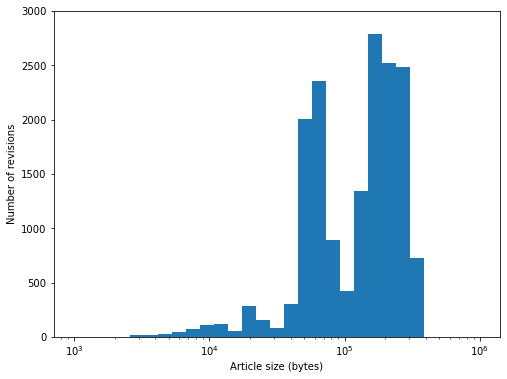

In [133]:
f,ax = plt.subplots(figsize=(8,6))

# Make the histogram
hillary_df['size'].hist(ax=ax,bins=np.geomspace(1e3,1e6,30))

ax.set_xscale('log')
ax.set_xlabel('Article size (bytes)')
ax.set_ylabel('Number of revisions')
ax.set_ylim((0,3000))
ax.grid(None)

We could also use pandas's `Grouper` functionality to group the content by the "timestamp" keyword with a monthly frequency and aggregate to the median "size" to make a plot of the article length over time. I use a `.fillna(method='ffill')` to fill the missing article sizes from the previously-observed size.

In [134]:
# Identical to below, just one line
# hillary_size_gb = hillary_df.groupby(pd.Grouper(key = 'timestamp',freq = 'w',dropna = False) )

# Groupby
hillary_size_gb = hillary_df.groupby(
    pd.Grouper(
        key = 'timestamp',
        freq = 'w',
        dropna = False
    )
)

# Aggregate
hillary_size_agg = hillary_size_gb.agg({'size':'median'})

# Fill missing values from previously observed size
hillary_size_agg = hillary_size_agg.fillna(method='ffill')

# Inspect
hillary_size_agg.head()

,size
timestamp,
2001-03-11 00:00:00+00:00,207.0
2001-03-18 00:00:00+00:00,207.0
2001-03-25 00:00:00+00:00,207.0
2001-04-01 00:00:00+00:00,207.0
2001-04-08 00:00:00+00:00,207.0


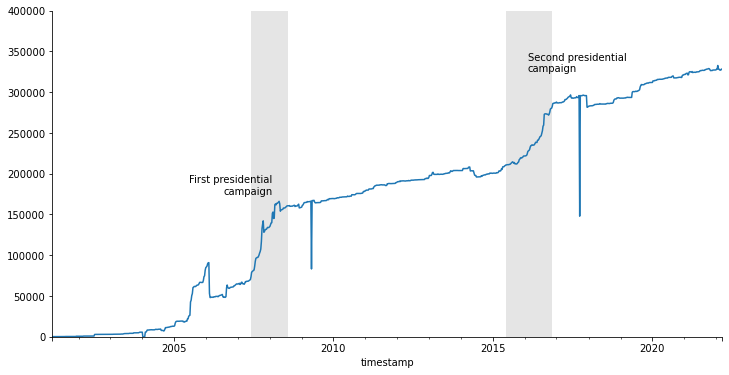

In [137]:
# Setup
f,ax = plt.subplots(figsize=(12,6))

# Make the line plot
hillary_size_agg['size'].plot(ax=ax)

ax.set_ylim((0,400000))

# Add span for first presidential campaign
ax.axvspan(
    xmin = pd.Timestamp('2007-06-01'),
    xmax = pd.Timestamp('2008-08-01'),
    ymin = 0,
    ymax = 1,
    facecolor = 'k',
    alpha = .1
)

ax.annotate(
    text = "First presidential\ncampaign",
    xy = (pd.Timestamp('2008-02-01'),175000),
    ha = 'right'
)

# Add span for second presidential campaign
ax.axvspan(pd.Timestamp('2015-06-01'),pd.Timestamp('2016-11-01'),0,1,facecolor='k',alpha=.1)
ax.annotate("Second presidential\ncampaign",(pd.Timestamp('2016-02-01'),325000),ha='left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The "sha1" is a [cryptographic hash](https://en.wikipedia.org/wiki/Cryptographic_hash_function) of the page's content. Hashing like this is how your passwords and other secure information are (should be!) stored in databases. It's easy to turn a string of characters into a hash but (hopefully!) extremely difficult to turn the hash back into the original string of characters.

What that means for Wikipedia is this value captures whether the content of a revision is identical to any other revision. This can happen when there is an "[edit war](https://en.wikipedia.org/wiki/Wikipedia:Edit_warring)" and editors are fighting over what content to include or exclude. If there's even a single byte difference in the content, a different sha1 will be generated. This is helpful to count the number of unique versions when aggregating.

In [138]:
# Count the most frequently occurring versions
hillary_df['sha1'].value_counts().head()

da39a3ee5e6b4b0d3255bfef95601890afd80709    29
bbb7b7edb7a5d387e93514e2dd07eac6f7b06426    23
d3e1a47502b1f74f7591f91b51c78991300ff464    19
35cacf3fb8fbd482927da227238ccbfd6ae824bd    18
82b6ec557ba7ba85bbcb20e3907cf3c3dd5e8ebb    17
Name: sha1, dtype: int64

Make a plot of the number of unique revisions per week by using a `Grouper` on the "timestamp" column to aggregate the number of unique "sha1" commits.

Text(2016-02-01 00:00:00, 250, 'Second presidential\ncampaign')

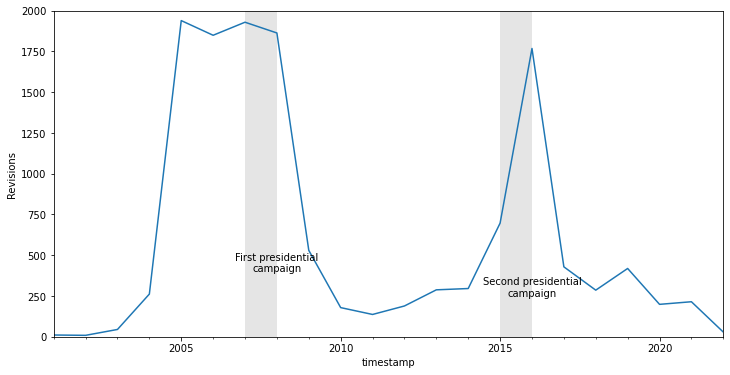

In [143]:
weekly_revs_s = hillary_df.groupby(pd.Grouper(key='timestamp',freq='Y',dropna=False)).agg({'sha1':'nunique'})['sha1']

f,ax = plt.subplots(figsize=(12,6))

weekly_revs_s.plot(ax=ax)

ax.set_ylabel("Revisions")
ax.set_ylim((0,2000))

# Add span for first presidential campaign
ax.axvspan(pd.Timestamp('2007-06-01'),pd.Timestamp('2008-11-01'),0,1,facecolor='k',alpha=.1)
ax.annotate("First presidential\ncampaign",(pd.Timestamp('2008-02-01'),400),ha='center')

# Add span for second presidential campaign
ax.axvspan(pd.Timestamp('2015-06-01'),pd.Timestamp('2016-11-01'),0,1,facecolor='k',alpha=.1)
ax.annotate("Second presidential\ncampaign",(pd.Timestamp('2016-02-01'),250),ha='center')


I've derived some secondard statistics like the size of the changes a revision instroduced (in bytes). These can be positive (adding content), negative (removing content), or zero (reformatting content).

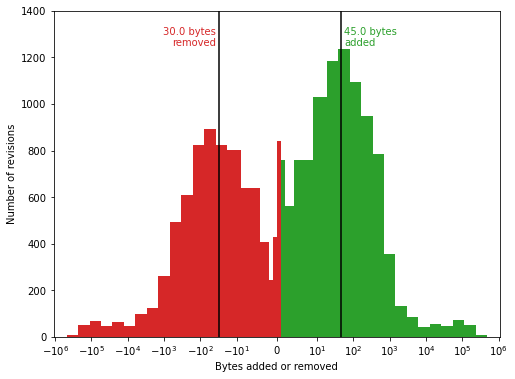

In [144]:
# Concatenate negative and positive geometrically spaced bins together 
_bins = np.concatenate((np.geomspace(-1e6,-1e0,20),[0],np.geomspace(1e0,1e6,20)))

# Make the histogram
f,ax = plt.subplots(figsize=(8,6))

# Filter for negative differences
neg_diffs = hillary_df.loc[hillary_df['diff'] <= 0,'diff']

# Make the negative side of the histogram, in red
neg_diffs.hist(bins=_bins,ax=ax,color='tab:red')

# Filter for positive diffs
pos_diffs = hillary_df.loc[hillary_df['diff'] > 0,'diff']

# Make the positive side of the histogram, in green
pos_diffs.hist(bins=_bins,ax=ax,color='tab:green')

# Annotate
neg_median = neg_diffs.median()
pos_median = pos_diffs.median()

ax.axvline(neg_median,c='k')
ax.axvline(pos_median,c='k')

ax.text(x=neg_median*1.25,y=1250,s="{0:.1f} bytes\nremoved".format(-neg_median),color='tab:red',ha='right')
ax.text(x=pos_median*1.25,y=1250,s="{0:.1f} bytes\nadded".format(pos_median),color='tab:green')

# Scale the x-axis on a "symlog" to capture negative numbers
ax.set_xscale('symlog',linthresh=1e1)

# Label
ax.set_xlabel('Bytes added or removed')
ax.set_ylabel('Number of revisions')
ax.set_ylim((0,1400))
ax.grid(None)

The "lag" is the time (in seconds) since the last edit.

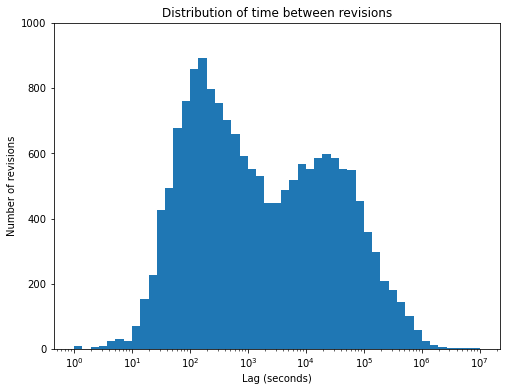

In [145]:
# Make the histogram
f,ax = plt.subplots(figsize=(8,6))

# Filter for negative differences
hillary_df['lag'].hist(ax=ax,bins=np.geomspace(1e0,1e7,50))

# Prettify
ax.set_xscale('log')
ax.set_xlabel('Lag (seconds)')
ax.set_ylabel('Number of revisions')
ax.set_title('Distribution of time between revisions')
ax.set_ylim((0,1000))
ax.grid(None)

The "age" is the time (in days) since the first revision when the revision was made.

<AxesSubplot:>

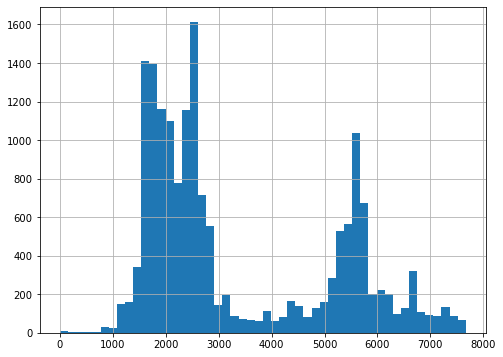

In [146]:
# Make the histogram
f,ax = plt.subplots(figsize=(8,6))

# Filter for negative differences
hillary_df['age'].hist(ax=ax,bins=50)

## Appendix

Download the data about the S&P 500 index since January 2017

In [ ]:
# !pip install yfinance
import yfinance as yf

sp500_df = yf.download(tickers='^GSPC',
                         start='2010-01-01',
                         end='2022-03-01',
                         progress=False)

sp500_df.to_csv('sp500_close_volume.csv',encoding='utf8')

In [ ]:
sp500_df['Adj Close'].plot()

### Customizing ticks
Remember that we can customize anything in this plot. Let's start by rotating the x-tick labels to be vertical.  The way I would do this for other kinds of plots with x_ticklabels would be to get and set them.

In [ ]:
# Set up plot
f,ax = plt.subplots(figsize=(12,6))

# Make the plot
sp500_df.loc['2022':,'Adj Close'].plot(ax=ax)

# Label the plot
ax.set_title('S&P500 Adjusted Closing Values, 2022-present')
ax.set_ylabel('Adjusted Close')
ax.set_xlabel('Date')

# Get and set the labels with a new rotation
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Where are my labels? What are these numbers? What happened to my `datetime` or `Timestamp` objects? This can be really frustrating! I personally don't know a lot about it before writing this, so I'm just a few days ahead of you in learning about this.

The first thing to note is that the x-ticks are not `datetime` or `Timestamp` objects, they have been converted to floats. The number of dates and ticks are the same, so there must be some kind of mapping of the float 18993 to "2022-01-01", 19000 to "2022-01-08", *etc*.

In [ ]:
ax.get_xticks()

We will need some powerful matplotlib helper classes: ticker ([docs](https://matplotlib.org/stable/api/ticker_api.html)) and dates ([docs](https://matplotlib.org/stable/api/dates_api.html)). I am also working from these gallery examples and user guides, but they leave a lot to be desired:

* [Date Index Formatter](https://matplotlib.org/stable/gallery/ticks/date_index_formatter2.html)
* [Date tick labels](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html)
* [Date Demo Convert](https://matplotlib.org/stable/gallery/ticks/date_demo_convert.html)
* [Formatting date ticks using ConciseDateFormatter](https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html)
* [Placing date ticks using recurrence rules](https://matplotlib.org/stable/gallery/ticks/date_demo_rrule.html)

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

Functions in `mdates` like `num2date`, `date2num`, and `datestr2num` seem like promising leads! These take a float representing the number of days since 1 January 1970 (the "[UNIX epoch](https://en.wikipedia.org/wiki/Unix_time)"): January 1, 2022 is 18,993 days since 1 January 1970.

In [ ]:
# Take one of the date floats and turn it into a datetime object
mdates.num2date(18993)

In [ ]:
# Take a datetime object and turn it into a date float
mdates.date2num(datetime.datetime(2022,3,8))

In [ ]:
# Take a datetime string and turn it into a date float
mdates.datestr2num('1970-01-02')

### Locators

The `set_major_locator` and `set_minor_locator` methods accept a "Locator" object and change the frequency of when the major and minor ticks appear. In the example below, our major locator make ticks every 6 months and minor ticks every month. 

In [ ]:
# Set up plot
f,ax = plt.subplots(figsize=(12,6))

# Make the plot
sp500_df.loc['2021':,'Adj Close'].plot(ax=ax)

# Major ticks for January and July
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))

# Minor ticks for every month
ax.xaxis.set_minor_locator(mdates.MonthLocator())

We can change to have the major ticks be years and the days be a day of the week like Monday (0).

In [ ]:
# Set up plot
f,ax = plt.subplots(figsize=(12,6))

# Make the plot
sp500_df.loc['2021':,'Adj Close'].plot(ax=ax)

# Major ticks for January and July
ax.xaxis.set_major_locator(mdates.YearLocator())

# Minor ticks for every seventh day
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(0))

We could change the major locator to be every quarter and the minor locator to be every seven days, but this doesn't line up cleanly with the start/end of months.

In [ ]:
# Set up plot
f,ax = plt.subplots(figsize=(12,6))

# Make the plot
sp500_df.loc['2021':,'Adj Close'].plot(ax=ax)

# Major ticks for January and July
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,4,7,10)))

# Minor ticks for every seventh day
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

### Formatters

In [ ]:
# Set up plot
f,ax = plt.subplots(figsize=(12,6))

# Make the plot
sp500_df.loc['2021':,'Adj Close'].plot(ax=ax)

# Major ticks for January and July
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,4,7,10)))

# Minor ticks for every seventh day
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator())
)

In [ ]:
# Set up plot
f,ax = plt.subplots(figsize=(12,6))

# Make the plot
sp500_df.loc['2021':,'Adj Close'].plot(ax=ax)

# Major ticks for January and July
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,4,7,10)))

# Minor ticks for every seventh day
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

# Format dates to be YYYY-MonthAbbrev
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))

# Change the rotation
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(0)
    label.set_horizontalalignment("center")